In [1]:
import pandas as pd
import numpy as np
from utils import *
import matplotlib.pyplot as plt

In [2]:
train_set, val_set, test_set = load_train_and_val()

In [3]:
all_data = pd.concat([train_set, val_set, test_set])

In [4]:
all_data

,par_id,art_id,keyword,countrycode,text,label,bin_label
2104,2105,@@402299,refugee,gb,"So , why should Germany of all countries offer...",1,False
5080,5081,@@20743982,poor-families,my,"On another matter , Lim said poor families fac...",1,False
2736,2737,@@22543664,poor-families,pk,The PMNHP was initiated to provide medical fac...,0,False
5197,5198,@@2270180,hopeless,ie,"Mr Justice Donal O'Donnell described as "" unde...",0,False
1945,1946,@@16397933,hopeless,sg,"Filipino crewman Glenn Alindajao , 31 , said i...",0,False
...,...,...,...,...,...,...,...
10462,10463,@@4676355,refugee,pk,""" The Pakistani police came to our house and t...",0,False
10463,10464,@@19612634,disabled,ie,When Marie O'Donoghue went looking for a speci...,0,False
10464,10465,@@14297363,women,lk,Sri Lankan norms and culture inhibit women fro...,1,False
10465,10466,@@70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0,False


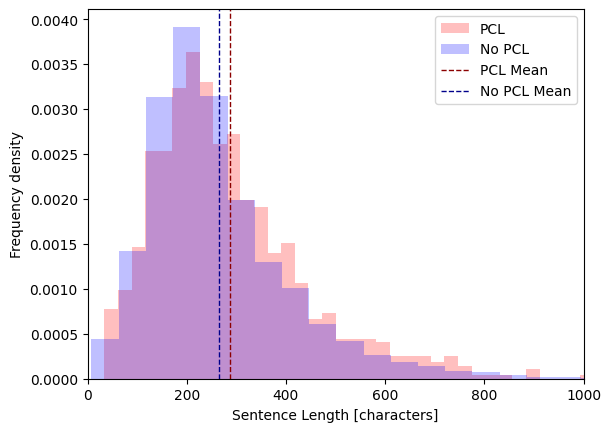

In [5]:
all_data['len'] = all_data['text'].str.len()

true_len_dist = all_data[all_data['bin_label'] == True]['len']
false_len_dist = all_data[all_data['bin_label'] == False]['len']

true_mean = np.mean(true_len_dist)
false_mean = np.mean(false_len_dist)

plt.hist(true_len_dist, bins=100, density=True, color='r', label='PCL', alpha = 0.25)
plt.hist(false_len_dist, bins=100, density=True, color='b', label='No PCL', alpha = 0.25)

plt.axvline(true_mean, color='darkred', linestyle='dashed', linewidth=1, label = 'PCL Mean')
plt.axvline(false_mean, color='darkblue', linestyle='dashed', linewidth=1, label='No PCL Mean')

plt.xlim(0,1000)
plt.ylabel('Frequency density')
plt.xlabel('Sentence Length [characters]')
plt.legend()
plt.savefig('figs/len_v_pcl_density.png')
plt.show()

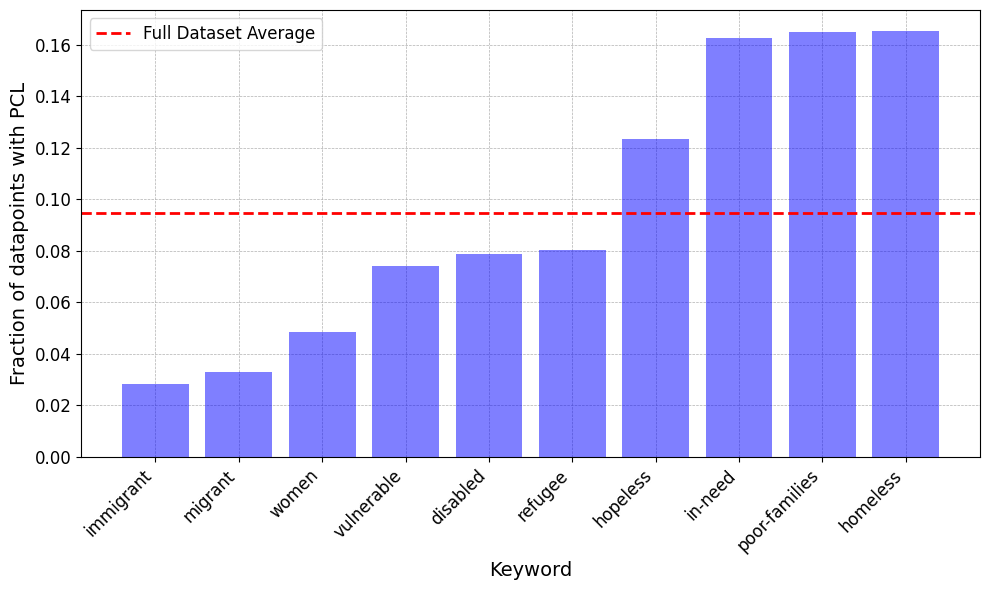

In [14]:
true_proportions = {}

for keyword in np.unique(all_data['keyword']):
    true_proportion = np.sum(all_data[all_data['keyword'] == keyword]['bin_label'] == True) / len(all_data[all_data['keyword'] == keyword])
    true_proportions[keyword] = true_proportion

true_proportions = {k: v for k, v in sorted(true_proportions.items(), key=lambda item: item[1])}

full_data_set = np.sum(all_data['bin_label'] == True) / len(all_data)

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Increased figure size for better readability

keywords = list(true_proportions.keys())
values = list(true_proportions.values())

ax.bar(keywords, values, color='blue', alpha = 0.5)  # Added color for a nicer look
ax.axhline(full_data_set, color='red', linestyle='--', linewidth=2, label='Full Dataset Average')


plt.xticks(rotation=45, ha="right", fontsize=12)  # Increased font size for x-ticks
plt.yticks(fontsize=12)  # Increased font size for y-ticks
plt.xlabel('Keyword', fontsize=14)  # Increased font size for x-label
plt.ylabel('Fraction of datapoints with PCL', fontsize=14)  # Increased font size for y-label

ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Added grid lines for better readability
ax.set_axisbelow(True)  # Ensure grid lines are behind the bars

plt.legend(fontsize=12, loc = 'upper left')
plt.tight_layout()

plt.savefig('figs/keyword_density.png')
plt.show()


### Qualitative assessment

Qualitative assessment of the dataset, considering either how hard or how subjective the task is, providing examples in your report. (10 marks)

In [7]:
train_set[train_set['bin_label'] == True]['text'].iloc[0]

'Most people around the world live in cities for work , but all too often these places leave people feeling trapped , unable to live life on their own terms and disconnected from their communities . Traffic ; lack of transport alternatives ; legacy infrastructure ; inadequate stadia and facilities ; restricted education choices ; poor access to health care ; unaffordable housing and time-poor families , are all cited as unattractive contributions to life in big cities .'

In [8]:
train_set[train_set['bin_label'] == True]

,par_id,art_id,keyword,countrycode,text,label,bin_label
2165,2166,@@9807531,poor-families,nz,Most people around the world live in cities fo...,2,True
2395,2396,@@24703849,migrant,ng,The letter ended with a call for the bishops t...,3,True
440,441,@@14491425,migrant,gh,It is often a painful and frustrating experien...,2,True
4606,4607,@@23260896,poor-families,in,"Now , we want to focus on infrastructure . Whe...",3,True
247,248,@@17606348,hopeless,ke,""" Clear evidence of outstanding miraculous occ...",4,True
...,...,...,...,...,...,...,...
3452,3453,@@3574984,in-need,sg,""" The offer to take 20,000 Syrians is welcome ...",3,True
5148,5149,@@1789214,vulnerable,gh,"Preaching the sermon , the Dean of the St. Pet...",2,True
2484,2485,@@23386836,in-need,hk,"In addition , Chan revealed that "" care and sh...",3,True
9761,9762,@@1033755,vulnerable,za,Cosatu deputy president Zingiswa Losi will joi...,2,True


In [9]:
df = load_pcl_categories()

In [10]:
for x in range(10000):
    counter = 0
    for idx, row in df[df['par_id'] == x].iterrows():
        # print(row['span_text'] +"\t<<" + row['pcl_category'] + ">>")
        counter += 1

    short = len(row['text']) < 150

    if short and counter > 2:
        print(x)

NameError: name 'row' is not defined

In [11]:
for idx, row in df[df['par_id'] == 9518].iterrows():
    print(row['span_text'] +"\t<<" + row['pcl_category'] + ">>")

print(row['text'])

the less fortunate	<<Compassion>>
Bond went out of his way to help the less fortunate	<<Unbalanced_power_relations>>
to take food to the homeless	<<Unbalanced_power_relations>>
to take food to the homeless	<<Shallow_solution>>
Bond went out of his way to help the less fortunate , often going on the road with Kim to take food to the homeless .
